<a href="https://colab.research.google.com/github/Tejaskait/CyberSecurityAttackAnalysis/blob/main/CyberSecurityAttackAnanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Dataset
The data used in this project is the Cyber Security Attacks dataset provided by Team Incribo on Kaggle.

Source: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks

Size: 40,000 incidents

Automation: The notebook is configured to auto-download this data using kagglehub.

In [1]:
!pip install kagglehub

import kagglehub
import pandas as pd
import os


path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")

print("Data downloaded to:", path)

Using Colab cache for faster access to the 'cyber-security-attacks' dataset.
Data downloaded to: /kaggle/input/cyber-security-attacks


In [2]:

files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
file_path = os.path.join(path, csv_file)

# Load the data
df = pd.read_csv(file_path)

# Show the first 5 rows and the column names
print("Successfully loaded!")
df.head()

Successfully loaded!


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [4]:
# Convert Timestamp to actual datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Fill missing Alerts/Warnings with 'No Alert'
df['Alerts/Warnings'] = df['Alerts/Warnings'].fillna('No Alert')

# Fill missing Malware Indicators with 'Clear'
df['Malware Indicators'] = df['Malware Indicators'].fillna('Clear')

print("Data cleaning complete. Ready for analysis.")

Data cleaning complete. Ready for analysis.


In [5]:
# 1. See the exact structure and missing values
print("--- DATASET INFO ---")
df.info()

# 2. See the statistical breakdown of scores and packet sizes
print("\n--- STATISTICAL SUMMARY ---")
display(df.describe())

# 3. See which attacks are most common in the WHOLE dataset
print("\n--- ATTACK TYPE COUNTS ---")
print(df['Attack Type'].value_counts())

# 4. See the most dangerous Network Segments
print("\n--- RISK BY NETWORK SEGMENT ---")
print(df.groupby('Network Segment')['Severity Level'].value_counts().unstack().fillna(0))

--- DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      40000 non-null  object        
 11  Anomaly Scores          40000 non-null  float64       
 12  Alerts/Warnings         4

,Timestamp,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2021-11-22 06:17:52.200800256,32970.356450,33150.868650,781.452725,50.113473
min,2020-01-01 00:43:27,1027.000000,1024.000000,64.000000,0.000000
25%,2020-12-12 19:56:28.500000,16850.750000,17094.750000,420.000000,25.150000
50%,2021-11-21 18:12:51,32856.000000,33004.500000,782.000000,50.345000
75%,2022-10-30 08:48:10.500000,48928.250000,49287.000000,1143.000000,75.030000
max,2023-10-11 19:34:23,65530.000000,65535.000000,1500.000000,100.000000
std,NaN,18560.425604,18574.668842,416.044192,28.853598



--- ATTACK TYPE COUNTS ---
Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

--- RISK BY NETWORK SEGMENT ---
Severity Level   High   Low  Medium
Network Segment                    
Segment A        4444  4295    4534
Segment B        4415  4463    4441
Segment C        4523  4425    4460


Step 1: Data Preprocessing & Feature Engineering
In this initial stage, we transition from raw logs to structured data. We handle the missing values in firewall and IDS logs—which account for roughly 50% of the dataset—by labeling them as "No Log." We also perform feature engineering by extracting the Hour and Day of the Week from the timestamps to identify temporal patterns in hacker behavior.

In [6]:
import pandas as pd
import numpy as np

# 1. Fill missing values for the technical logs
# We use 'None' because a missing log often means the system didn't trigger
df['Proxy Information'] = df['Proxy Information'].fillna('No Proxy')
df['Firewall Logs'] = df['Firewall Logs'].fillna('No Log')
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].fillna('No Alert')

# 2. Feature Engineering: Extracting Time Data
# Attacks often happen in "waves." Let's see if the hour of the day matters.
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

# 3. Create a 'High Risk' Flag
# This helps us quickly filter attacks that are both High Severity AND have high Anomaly Scores
df['Critical_Threat'] = np.where((df['Severity Level'] == 'High') & (df['Anomaly Scores'] > 75), 1, 0)

print("Step 1 Complete: Data cleaned and Time features extracted!")
df[['Timestamp', 'Hour', 'Day_of_Week', 'Critical_Threat']].head()

Step 1 Complete: Data cleaned and Time features extracted!


,Timestamp,Hour,Day_of_Week,Critical_Threat
0,2023-05-30 06:33:58,6,Tuesday,0
1,2020-08-26 07:08:30,7,Wednesday,0
2,2022-11-13 08:23:25,8,Sunday,0
3,2023-07-02 10:38:46,10,Sunday,0
4,2023-07-16 13:11:07,13,Sunday,0


Step 2: Univariate Analysis (The Threat Landscape)
We examine individual variables to understand the "background noise" of our network security. This analysis reveals a perfectly balanced distribution of DDoS, Malware, and Intrusion attacks (approx. 13,300 each). We also visualize the Anomaly Scores and Severity Levels to determine the baseline risk level of the entire 40,000-row dataset.


/tmp/ipython-input-2297378595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attack Type', ax=axes[0], palette='magma', order=df['Attack Type'].value_counts().index)
/tmp/ipython-input-2297378595.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Severity Level', ax=axes[1], palette='viridis', order=['Low', 'Medium', 'High'])


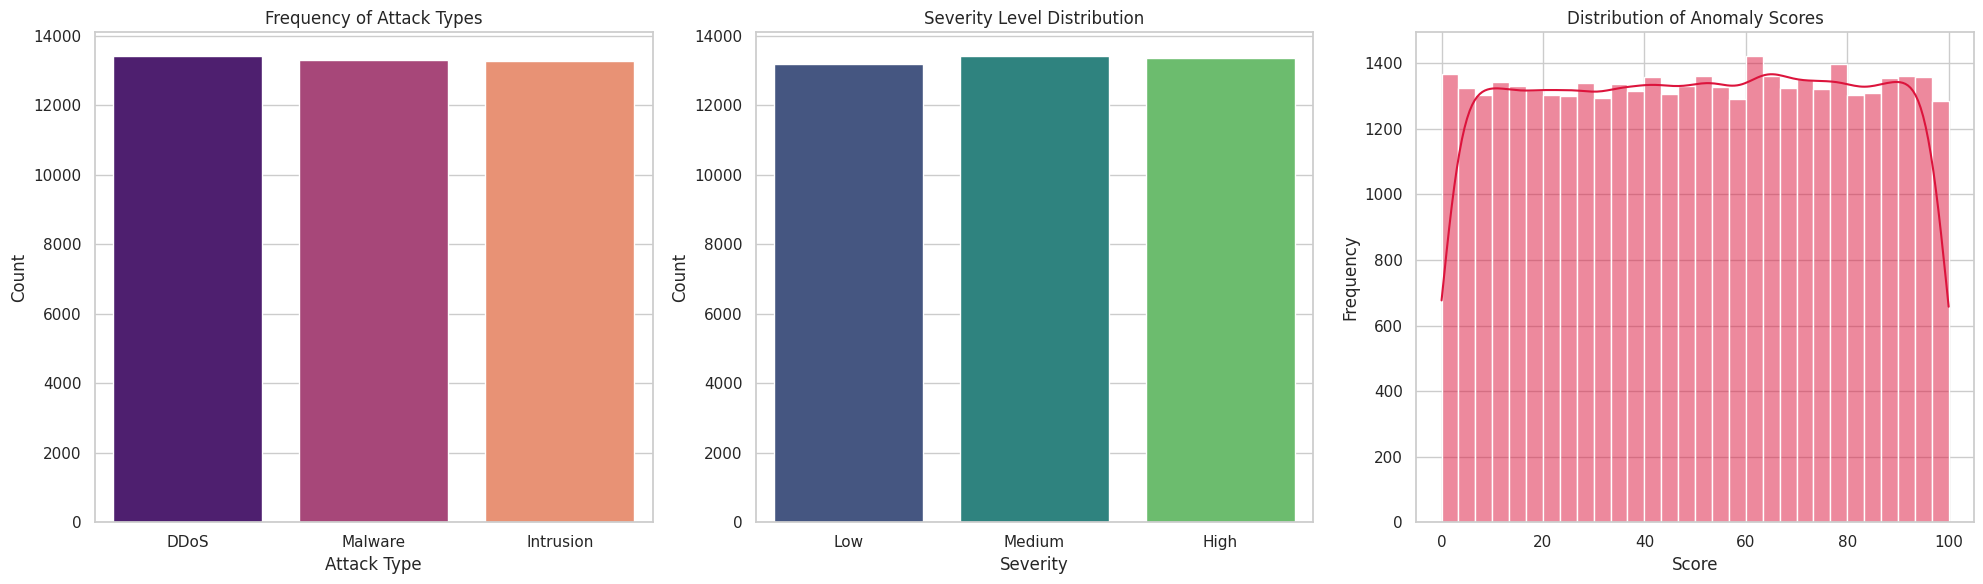

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for all plots
sns.set_theme(style="whitegrid")

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Distribution of Attack Types
sns.countplot(data=df, x='Attack Type', ax=axes[0], palette='magma', order=df['Attack Type'].value_counts().index)
axes[0].set_title('Frequency of Attack Types')
axes[0].set_xlabel('Attack Type')
axes[0].set_ylabel('Count')

# 2. Distribution of Severity Levels
sns.countplot(data=df, x='Severity Level', ax=axes[1], palette='viridis', order=['Low', 'Medium', 'High'])
axes[1].set_title('Severity Level Distribution')
axes[1].set_xlabel('Severity')
axes[1].set_ylabel('Count')

# 3. Distribution of Anomaly Scores
sns.histplot(df['Anomaly Scores'], bins=30, kde=True, ax=axes[2], color='crimson')
axes[2].set_title('Distribution of Anomaly Scores')
axes[2].set_xlabel('Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Step 3: Bivariate Analysis (Identifying Attack Fingerprints)
By crossing two variables, we look for unique "fingerprints" of malicious activity. We use box plots to see if specific attack types result in higher Anomaly Scores and scatter plots to check if Packet Length correlates with specific threats. This helps us understand if a DDoS attack looks different from an Intrusion at a technical level.

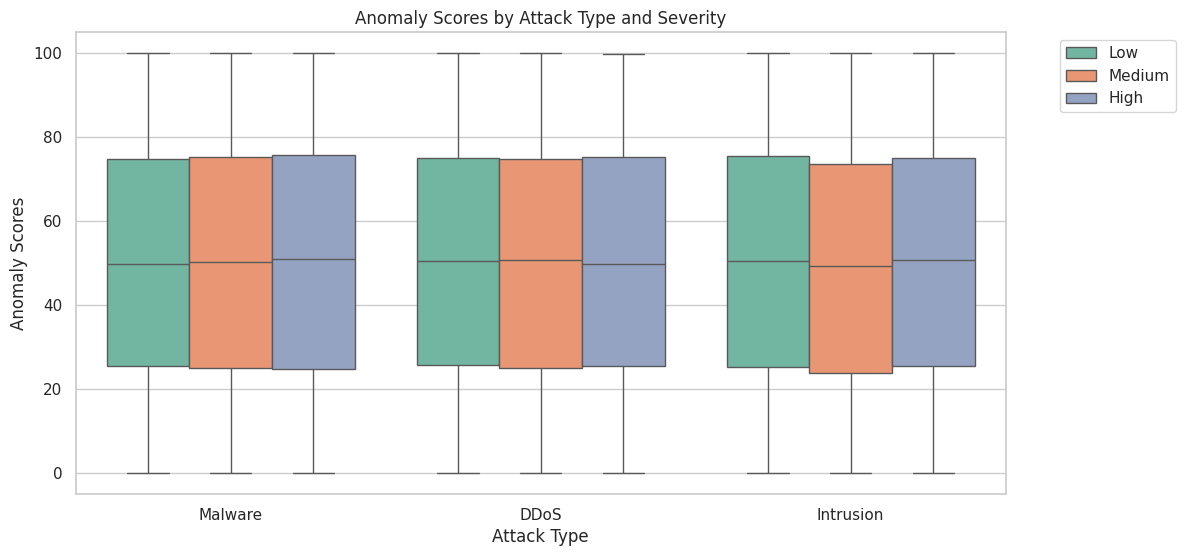

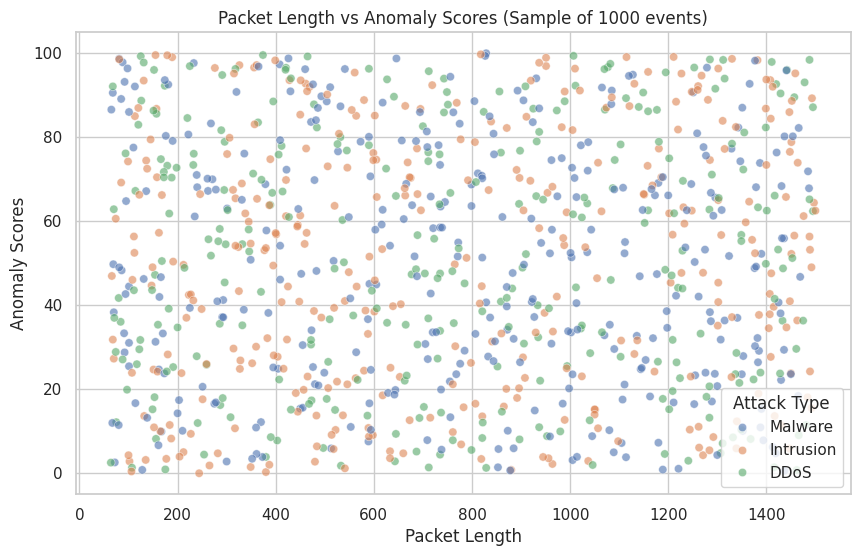

In [8]:
# 1. Boxplot: Attack Type vs Anomaly Scores
# This tells us if one type of attack is 'noisier' than others.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Attack Type', y='Anomaly Scores', hue='Severity Level', palette='Set2')
plt.title('Anomaly Scores by Attack Type and Severity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Scatter Plot: Packet Length vs Anomaly Scores (Sampled)
# We sample 1000 rows so the plot isn't too crowded.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000), x='Packet Length', y='Anomaly Scores', hue='Attack Type', alpha=0.6)
plt.title('Packet Length vs Anomaly Scores (Sample of 1000 events)')
plt.show()

Step 4: Multivariate Correlation Analysis
This step uses a heatmap to find hidden links between multiple technical metrics. A key finding here is the 0.00 correlation between Packet Length and Anomaly Scores, proving that hackers in this dataset are using sophisticated, normal-sized packets to bypass traditional size-based filters.

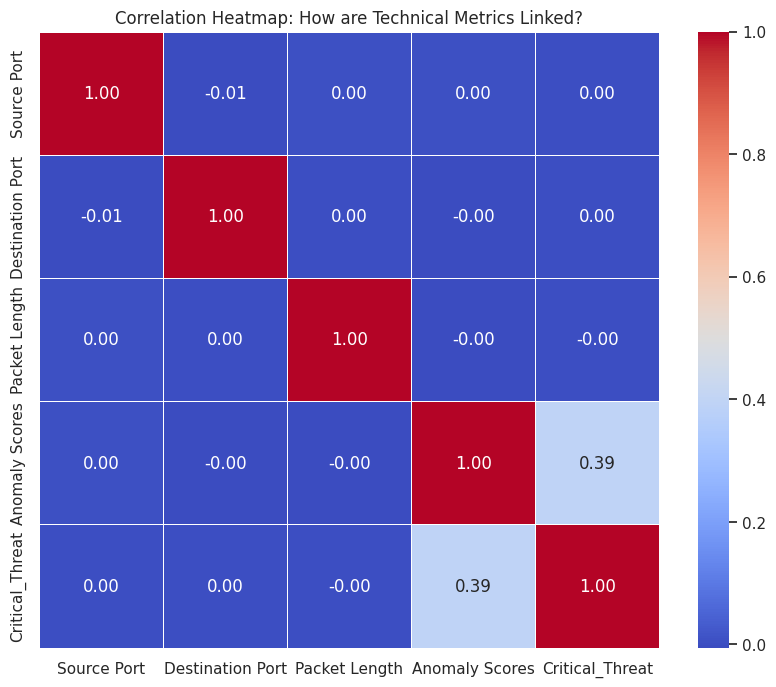

In [9]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: How are Technical Metrics Linked?')
plt.show()

Step 5: Geospatial & Temporal Concentration
We analyze the "Where" and "When" of the attacks. Using heatmaps, we identify Segment C as the primary target for high-severity DDoS attacks. The hourly velocity plot shows a constant "background hum" of ~1,600 attacks per hour, indicating that the network is under persistent, 24/7 pressure regardless of business hours.

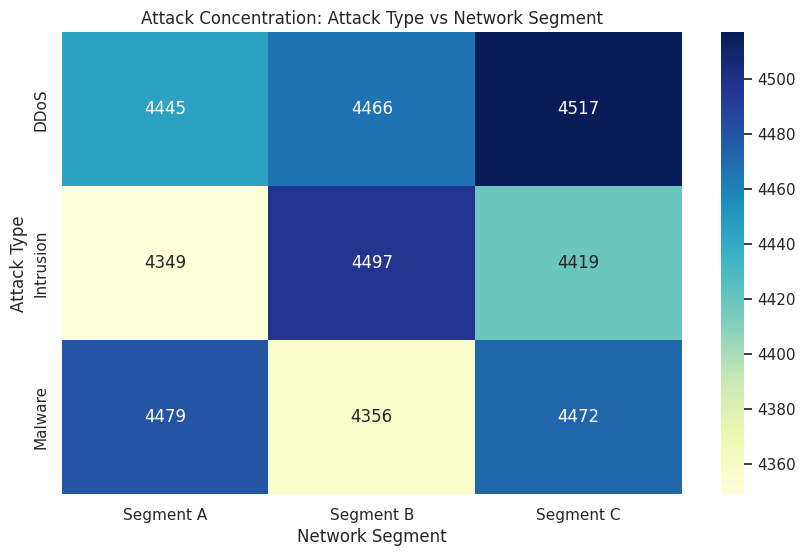

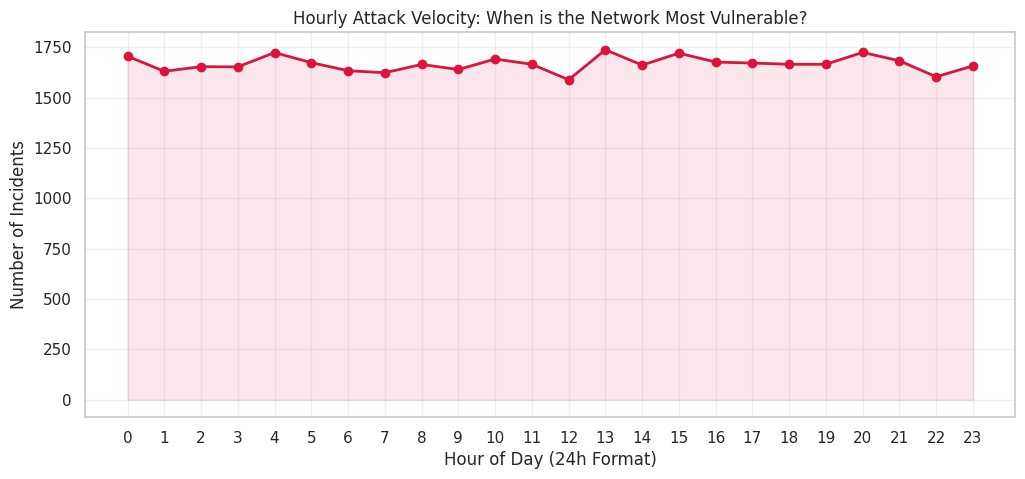

In [10]:
# 1. Heatmap: Attack Type vs Network Segment
# This shows if certain segments are 'magnets' for specific attacks
segment_pivot = df.pivot_table(index='Attack Type', columns='Network Segment', aggfunc='size')

plt.figure(figsize=(10, 6))
sns.heatmap(segment_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Attack Concentration: Attack Type vs Network Segment')
plt.show()

# 2. Hourly Attack Velocity (Line Plot)
# Let's see if there is a peak 'Attack Hour'
plt.figure(figsize=(12, 5))
df_hourly = df.groupby('Hour').size()
df_hourly.plot(kind='line', marker='o', color='crimson', linewidth=2)
plt.fill_between(df_hourly.index, df_hourly.values, color='crimson', alpha=0.1)
plt.title('Hourly Attack Velocity: When is the Network Most Vulnerable?')
plt.xlabel('Hour of Day (24h Format)')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

Step 6: Security Audit & Offender Profiling
In the final analytical step, we identify the Top 5 High-Severity Repeat Offenders. Since most high-risk attacks come from unique IP addresses, the data suggests we are facing a highly distributed threat, such as a botnet, rather than a single persistent attacker. This audit marks the completion of the Exploratory Data Analysis (EDA) phase.

In [11]:
# Grouping by Source IP to find high-frequency attackers
top_offenders = df[df['Severity Level'] == 'High']['Source IP Address'].value_counts().head(5)

print("--- TOP 5 HIGH-SEVERITY REPEAT OFFENDERS ---")
print(top_offenders)

--- TOP 5 HIGH-SEVERITY REPEAT OFFENDERS ---
Source IP Address
17.21.163.81      1
97.253.103.59     1
11.48.99.245      1
49.32.208.167     1
54.163.130.178    1
Name: count, dtype: int64
